# BMI 565: Bioinformatics Programming & Scripting

#### (C) Michael Mooney (mooneymi@ohsu.edu)

## Week 8 - Statistics in Python

1. Pandas for Data Analysis
    - Labeled data structures
    - Plotting with `Pandas`
2. Statistics
    - Descriptive Statistics
    - Linear regression

#### Requirements

- Python 2.7
- `numpy` module
- `scipy` module
- `pandas` module
- `statsmodels` module
- Data Files
    - `./data/serotonin_data.txt`

In [1]:
## The following line is only needed inside the Jupyter 
## notebook, it is not a Python statement
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

## `Pandas` Module

The `pandas` module contains a lot of great functionality for working with large data sets. `Pandas` is built on top of `Numpy` and works well with numerous other Python packages for scientific computing.

[http://pandas.pydata.org/pandas-docs/stable/index.html](http://pandas.pydata.org/pandas-docs/stable/index.html)


Example data ('./data/serotonin.txt') from the lava R package: [http://cran.r-project.org/web/packages/lava/index.html](http://cran.r-project.org/web/packages/lava/index.html)

### Labeled Data Structures

#### The `DataFrame` data structure

In [3]:
df1 = pd.DataFrame(np.random.rand(5,5), index=[1,2,3,4,5], columns=['A','B','C','D','E'])
df1.head(4)

,A,B,C,D,E
1,0.176191,0.234537,0.049403,0.026004,0.190589
2,0.691387,0.636359,0.315934,0.174387,0.040181
3,0.767453,0.610150,0.144647,0.787189,0.887500
4,0.630868,0.851399,0.565896,0.343713,0.771409


#### The `Series` data structure

In [4]:
s1 = pd.Series(0, index=df1.index)
s1

1    0
2    0
3    0
4    0
5    0
dtype: int64

In [5]:
## Read data into a pandas data frame
## Default options assume comma as delimiter and a header line with column names
dat = pd.read_csv('./data/serotonin_data.txt')

In [6]:
## Check the dimensions of the data frame
dat.shape

(250, 20)

In [7]:
## Get the column names
list(dat.columns.values)

['par',
 'sfc',
 'aci',
 'pci',
 'u1',
 'cau',
 'th',
 'put',
 'mid',
 'u2',
 'mem',
 'u',
 'age',
 'gene1',
 'gene2',
 'eta',
 'day',
 'depr',
 'T',
 'status']

In [8]:
## View the first few rows
dat.head()

,par,sfc,aci,pci,u1,cau,th,put,mid,u2,mem,u,age,gene1,gene2,eta,day,depr,T,status
0,1.541845,1.639296,1.631768,1.436017,3.053231,0.941444,1.062079,0.988974,0.849440,0.452027,49,1.918266,-1.137870,1,1,-0.425573,30,0,1.019006,1
1,1.285776,1.314337,1.224379,1.154257,0.536178,1.018560,0.789055,0.903791,0.666955,-0.937675,36,-0.575754,-0.951810,1,1,-2.959047,246,1,30.000000,0
2,1.633392,1.731265,1.588976,1.580385,3.881156,0.965680,0.741293,0.389869,0.830224,-7.700945,169,4.751934,1.619259,1,1,4.244131,243,1,30.000000,0
3,1.971132,1.735649,1.768737,1.852557,4.071059,0.944994,0.643423,0.706459,0.822270,-4.530420,196,3.860327,0.167814,0,0,3.280688,335,0,30.000000,0
4,1.376904,1.423676,1.461504,1.169873,1.043610,0.778490,0.959439,0.968423,0.886591,-1.161456,64,0.974215,-0.908178,1,1,-1.082029,215,0,4.835404,1


In [9]:
## Use slice notation to get a subset of rows
dat[0:5]

,par,sfc,aci,pci,u1,cau,th,put,mid,u2,mem,u,age,gene1,gene2,eta,day,depr,T,status
0,1.541845,1.639296,1.631768,1.436017,3.053231,0.941444,1.062079,0.988974,0.849440,0.452027,49,1.918266,-1.137870,1,1,-0.425573,30,0,1.019006,1
1,1.285776,1.314337,1.224379,1.154257,0.536178,1.018560,0.789055,0.903791,0.666955,-0.937675,36,-0.575754,-0.951810,1,1,-2.959047,246,1,30.000000,0
2,1.633392,1.731265,1.588976,1.580385,3.881156,0.965680,0.741293,0.389869,0.830224,-7.700945,169,4.751934,1.619259,1,1,4.244131,243,1,30.000000,0
3,1.971132,1.735649,1.768737,1.852557,4.071059,0.944994,0.643423,0.706459,0.822270,-4.530420,196,3.860327,0.167814,0,0,3.280688,335,0,30.000000,0
4,1.376904,1.423676,1.461504,1.169873,1.043610,0.778490,0.959439,0.968423,0.886591,-1.161456,64,0.974215,-0.908178,1,1,-1.082029,215,0,4.835404,1


In [10]:
## Select a single column (use a list to get multiple columns)
dat['par'][:5]
#dat[['par', 'sfc']][:5]

0    1.541845
1    1.285776
2    1.633392
3    1.971132
4    1.376904
Name: par, dtype: float64

In [11]:
np.mean(dat['par'])

1.2908740433900916

In [12]:
## Use the iloc attribute to subset a dataframe using indexes
dat.iloc[0:5,0:5]

,par,sfc,aci,pci,u1
0,1.541845,1.639296,1.631768,1.436017,3.053231
1,1.285776,1.314337,1.224379,1.154257,0.536178
2,1.633392,1.731265,1.588976,1.580385,3.881156
3,1.971132,1.735649,1.768737,1.852557,4.071059
4,1.376904,1.423676,1.461504,1.169873,1.043610


In [13]:
## Subsetting the data structure based on a condition
gene_idx = (dat['gene1'] == 1) & (dat['gene2'] == 1)
gene_idx

0       True
1       True
2       True
3      False
4       True
5       True
6      False
7      False
8       True
9      False
10     False
11     False
12      True
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
220    False
221     True
222     True
223     True
224    False
225     True
226    False
227     True
228    False
229     True
230    False
231    False
232    False
233     True
234    False
235    False
236    False
237    False
238    False
239    False
240    False
241    False
242    False
243     True
244    False
245    False
246    False
247    False
248    False
249    False
dtype: bool

In [14]:
dat[gene_idx][1:5]

,par,sfc,aci,pci,u1,cau,th,put,mid,u2,mem,u,age,gene1,gene2,eta,day,depr,T,status
1,1.285776,1.314337,1.224379,1.154257,0.536178,1.018560,0.789055,0.903791,0.666955,-0.937675,36,-0.575754,-0.951810,1,1,-2.959047,246,1,30.000000,0
2,1.633392,1.731265,1.588976,1.580385,3.881156,0.965680,0.741293,0.389869,0.830224,-7.700945,169,4.751934,1.619259,1,1,4.244131,243,1,30.000000,0
4,1.376904,1.423676,1.461504,1.169873,1.043610,0.778490,0.959439,0.968423,0.886591,-1.161456,64,0.974215,-0.908178,1,1,-1.082029,215,0,4.835404,1
5,0.806983,1.058278,1.115488,0.651795,-1.917271,0.845913,0.901128,1.074159,1.008709,-0.411856,144,-0.254622,1.341796,1,1,0.000730,257,1,30.000000,0


In [15]:
## Get a table of variable values
gene1_counts = dat['gene1'].value_counts()
gene1_counts

0    133
1    117
Name: gene1, dtype: int64

### Plotting with `Pandas`

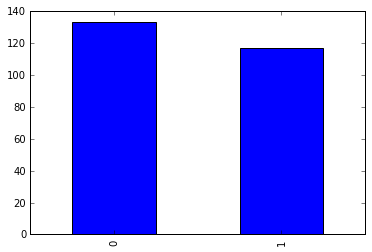

In [16]:
## Bar plot
gene1_counts.plot(kind="bar")

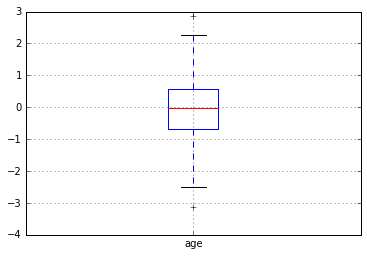

In [17]:
## Box plot
x = dat.boxplot(column='age', return_type='axes')
plt.savefig('boxplot1.pdf')

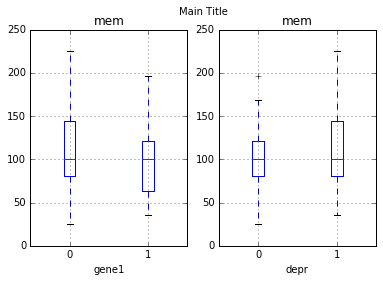

In [18]:
## Test
#fig = plt.figure()
fig, axes = plt.subplots(1,2)
dat.boxplot(column='mem', by='gene1', ax=axes[0], return_type='axes')
dat.boxplot(column='mem', by='depr', ax=axes[1], return_type='axes')
fig.texts = []
fig.texts = [fig.suptitle("Main Title")]
fig.savefig("testfig.png", format='png')

In [19]:
plt.close()

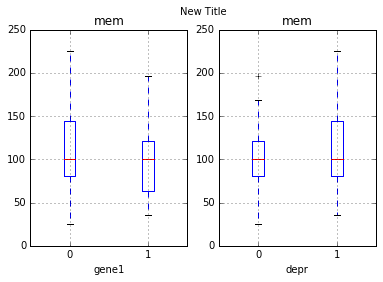

In [20]:
fig, axes = plt.subplots(1,2)
dat.boxplot(column='mem', by='gene1', ax=axes[0], return_type='axes')
dat.boxplot(column='mem', by='depr', ax=axes[1], return_type='axes')
fig.suptitle("New Title")

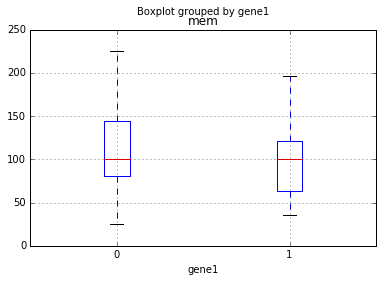

In [21]:
dat.boxplot(column='mem', by='gene1')

In [22]:
help(dat.boxplot)

Help on method boxplot in module pandas.core.frame:

boxplot(self, column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, **kwds) method of pandas.core.frame.DataFrame instance
    Make a box plot from DataFrame column optionally grouped by some columns or
    other inputs
    
    Parameters
    ----------
    data : the pandas object holding the data
    column : column name or list of names, or vector
        Can be any valid input to groupby
    by : string or sequence
        Column in the DataFrame to group by
    ax : Matplotlib axes object, optional
    fontsize : int or string
    rot : label rotation angle
    figsize : A tuple (width, height) in inches
    grid : Setting this to True will show the grid
    layout : tuple (optional)
        (rows, columns) for the layout of the plot
    return_type : {'axes', 'dict', 'both'}, default 'dict'
        The kind of object to return. 'dict' returns a dictionary
        whose val

In [23]:
## Get the median of the 'mem' column
dat['mem'].median()

100.0

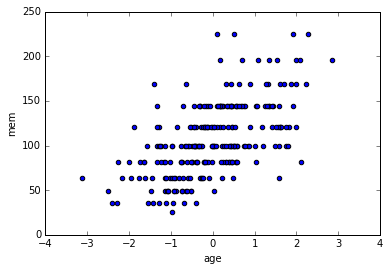

In [24]:
## Scatter plot
dat.plot(x='age', y='mem', kind="scatter")

In [25]:
## Create a new column
dat['age_cat'] = pd.Series(0, index=dat.index)

In [26]:
dat.head()

,par,sfc,aci,pci,u1,cau,th,put,mid,u2,...,u,age,gene1,gene2,eta,day,depr,T,status,age_cat
0,1.541845,1.639296,1.631768,1.436017,3.053231,0.941444,1.062079,0.988974,0.849440,0.452027,...,1.918266,-1.137870,1,1,-0.425573,30,0,1.019006,1,0
1,1.285776,1.314337,1.224379,1.154257,0.536178,1.018560,0.789055,0.903791,0.666955,-0.937675,...,-0.575754,-0.951810,1,1,-2.959047,246,1,30.000000,0,0
2,1.633392,1.731265,1.588976,1.580385,3.881156,0.965680,0.741293,0.389869,0.830224,-7.700945,...,4.751934,1.619259,1,1,4.244131,243,1,30.000000,0,0
3,1.971132,1.735649,1.768737,1.852557,4.071059,0.944994,0.643423,0.706459,0.822270,-4.530420,...,3.860327,0.167814,0,0,3.280688,335,0,30.000000,0,0
4,1.376904,1.423676,1.461504,1.169873,1.043610,0.778490,0.959439,0.968423,0.886591,-1.161456,...,0.974215,-0.908178,1,1,-1.082029,215,0,4.835404,1,0


In [27]:
## Set values based on a condition (use the loc attribute)
dat.loc[dat['age'] > 0, 'age_cat'] = 1

In [28]:
dat.head()

,par,sfc,aci,pci,u1,cau,th,put,mid,u2,...,u,age,gene1,gene2,eta,day,depr,T,status,age_cat
0,1.541845,1.639296,1.631768,1.436017,3.053231,0.941444,1.062079,0.988974,0.849440,0.452027,...,1.918266,-1.137870,1,1,-0.425573,30,0,1.019006,1,0
1,1.285776,1.314337,1.224379,1.154257,0.536178,1.018560,0.789055,0.903791,0.666955,-0.937675,...,-0.575754,-0.951810,1,1,-2.959047,246,1,30.000000,0,0
2,1.633392,1.731265,1.588976,1.580385,3.881156,0.965680,0.741293,0.389869,0.830224,-7.700945,...,4.751934,1.619259,1,1,4.244131,243,1,30.000000,0,1
3,1.971132,1.735649,1.768737,1.852557,4.071059,0.944994,0.643423,0.706459,0.822270,-4.530420,...,3.860327,0.167814,0,0,3.280688,335,0,30.000000,0,1
4,1.376904,1.423676,1.461504,1.169873,1.043610,0.778490,0.959439,0.968423,0.886591,-1.161456,...,0.974215,-0.908178,1,1,-1.082029,215,0,4.835404,1,0


In [29]:
dat['gene1'].value_counts()

0    133
1    117
Name: gene1, dtype: int64

In [30]:
dat.groupby(['gene1','gene2']).size()

gene1  gene2
0      0        60
       1        73
1      0        59
       1        58
dtype: int64

## Statistics in Python

The `statsmodels` package contains functions and classes for data exploration and many different statistical procedures (modeling, hypothesis testing). `Pandas` and `Scipy` also have statistics modules.

[http://statsmodels.sourceforge.net/stable/index.html](http://statsmodels.sourceforge.net/stable/index.html)

[http://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics](http://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics)

[http://docs.scipy.org/doc/scipy-0.13.0/reference/stats.html](http://docs.scipy.org/doc/scipy-0.13.0/reference/stats.html)

### Descriptive Statistics

In [31]:
## Pandas summary statistics
dat['age'].describe()

count    250.000000
mean      -0.009506
std        1.036330
min       -3.119118
25%       -0.676994
50%       -0.033606
75%        0.561708
max        2.861592
Name: age, dtype: float64

In [32]:
## Summary stats from SciPy
from scipy import stats
stats.describe(dat['age'])

DescribeResult(nobs=250, minmax=(-3.1191175148780097, 2.8615918114088901), mean=-0.0095057436157085923, variance=1.0739808473043826, skewness=0.056228167992158774, kurtosis=-0.11090770812166584)

In [33]:
## Summary stats from statsmodels
import statsmodels.api as sma
desc = sma.stats.DescrStatsW(dat[['age','mem']])
desc.mean

array([ -9.50574362e-03,   1.07140000e+02])

In [34]:
## Create a correlation matrix
desc.corrcoef

array([[ 1.        ,  0.59016791],
       [ 0.59016791,  1.        ]])

In [35]:
## Equivalent correlation matrix using Numpy
np.corrcoef(dat[['age','mem']], rowvar=0)

array([[ 1.        ,  0.59016791],
       [ 0.59016791,  1.        ]])

In [36]:
## Calculate a T-test to compare means
sma.stats.ttest_ind(dat['mem'][dat['gene1']==1], dat['mem'][dat['gene1']==0])

(-2.9567022934300766, 0.0034094451435307434, 248.0)

In [37]:
help(sma.stats.ttest_ind)

Help on function ttest_ind in module statsmodels.stats.weightstats:

ttest_ind(x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0)
    ttest independent sample
    
    convenience function that uses the classes and throws away the intermediate
    results,
    compared to scipy stats: drops axis option, adds alternative, usevar, and
    weights option
    
    Parameters
    ----------
    x1, x2 : array_like, 1-D or 2-D
        two independent samples, see notes for 2-D case
    alternative : string
        The alternative hypothesis, H1, has to be one of the following
    
           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means larger than value
           'smaller' :  H1: difference in means smaller than value
    
    usevar : string, 'pooled' or 'unequal'
        If ``pooled``, then the standard deviation of the samples is assumed to be
        the same. If ``unequal``, then Welsh tt

In [38]:
dat['mem'][dat['gene1']==1].mean()

99.11965811965813

In [39]:
dat['mem'][dat['gene1']==0].mean()

114.19548872180451

### Linear Regression

In [40]:
import statsmodels.formula.api as smf
mod = smf.ols(formula='mem ~ age', data=dat)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                    mem   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     132.5
Date:                Thu, 22 Sep 2016   Prob (F-statistic):           7.45e-25
Time:                        16:37:04   Log-Likelihood:                -1228.2
No. Observations:                 250   AIC:                             2460.
Df Residuals:                     248   BIC:                             2467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    107.3611      2.090     51.372      0.0

In [41]:
## The regression fit parameters
res.params

Intercept    107.361123
age           23.262082
dtype: float64

In [42]:
res.params[0]

107.36112338651378

## In-Class Exercises

In [ ]:
## Exercise 1.
## Create a new categorical variable in the serotonin data frame 
## called 'highmem'. Set the variable = 1 for subjects with a 'mem' 
## value > 100, otherwise 0. Split the data into two different 
## data frames based on the value of 'highmem'. Create boxplots 
## of 'age' for both data frames, and identify the mean, min, 
## max for each.
##


## References

1. [http://docs.scipy.org/doc/numpy/reference/index.html](http://docs.scipy.org/doc/numpy/reference/index.html)
2. [http://pandas.pydata.org/pandas-docs/stable/](http://pandas.pydata.org/pandas-docs/stable/)
3. [http://statsmodels.sourceforge.net/stable/index.html](http://statsmodels.sourceforge.net/stable/index.html)

#### Last Updated: 22-Sep-2016¶